In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.utils import to_categorical, plot_model

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



In [79]:
def classification(y_test, y_pred, verbose = 0):
    nn_accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    classification = classification_report(y_pred, y_test)

    if verbose == 1:
        print(f'Confusion Matrix: \n {cm}')
        print(f'Accuracy: {nn_accuracy}')
        print('Classification Report:')
        print(classification)

    return nn_accuracy, cm, classification

In [80]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

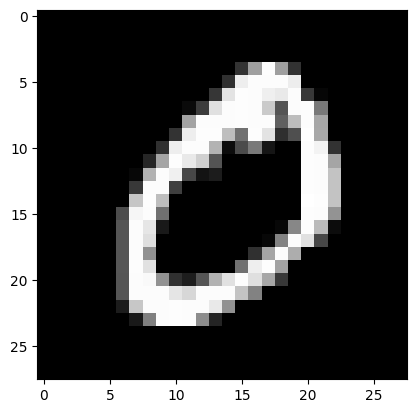

In [81]:
plt.imshow(x_train[1],cmap='gray')

In [82]:
num_labels = len(np.unique(y_train))

#### hotencoder

In [83]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [84]:
image_size = x_train.shape[1]
input_size = image_size * image_size

In [85]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [86]:
batch_size = 128
hidden_units = 256
dropout = 0.45

In [87]:
model = Sequential()
model.add(Dense(units=hidden_units, activation='relu', input_dim=input_size))
model.add(Dropout(dropout))
model.add(Dense(units=hidden_units, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(units=hidden_units, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(units=hidden_units, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(units=10, activation='softmax'))


c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [88]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [89]:
histcl = model.fit(x_train, y_train, epochs=20, batch_size=batch_size, validation_data=(x_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.6402 - loss: 1.0532 - val_accuracy: 0.9497 - val_loss: 0.1697
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9247 - loss: 0.2661 - val_accuracy: 0.9635 - val_loss: 0.1262
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9451 - loss: 0.2006 - val_accuracy: 0.9677 - val_loss: 0.1110
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9516 - loss: 0.1731 - val_accuracy: 0.9717 - val_loss: 0.0957
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9577 - loss: 0.1543 - val_accuracy: 0.9725 - val_loss: 0.0893
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9599 - loss: 0.1414 - val_accuracy: 0.9754 - val_loss: 0.0871
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9646 - loss: 0.1266 - val_accuracy: 0.9770 - val_loss: 0.0778
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9660 - loss: 0.1164 - val_accura

In [94]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 256)               │    200,960 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_4 (Dropout)             │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_39 (Dense)                │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_5 (Dropout)             │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_40 (Dense)                │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_6 (Dropout)             │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_41 (Dense)                │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_7 (Dropout)             │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_42 (Dense)                │ (None, 10)                │      2,570 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,202,720 (4.59 MB)

 Trainable params: 400,906 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 801,814 (3.06 MB)

In [90]:
y_pred = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [95]:
y_pred 

array([[2.8184993e-13, 1.8080334e-11, 8.0547785e-08, ..., 9.9999440e-01,
        1.7319360e-12, 5.4234902e-06],
       [7.0405303e-13, 2.6671319e-08, 9.9999928e-01, ..., 1.2903750e-07,
        5.0927098e-09, 1.0152085e-15],
       [1.9597421e-16, 1.0000000e+00, 2.8067295e-09, ..., 7.0787900e-09,
        2.4664603e-08, 4.6908901e-14],
       ...,
       [1.3026214e-12, 7.6010815e-07, 7.3434375e-10, ..., 2.0644853e-07,
        1.2004840e-09, 3.0449769e-06],
       [8.2395507e-19, 7.6865420e-22, 1.8109276e-20, ..., 9.5888317e-19,
        1.4365539e-12, 2.7080617e-11],
       [4.0391562e-12, 1.7726406e-14, 5.7273327e-13, ..., 2.3006459e-17,
        1.9403014e-12, 3.4709544e-17]], dtype=float32)

In [93]:
nn_accuracy, nn_cm, nn_classification = classification(y_test, y_pred, verbose=1)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets